<a href="https://colab.research.google.com/github/andersonmdcanteli/wordle/blob/main/wordle_only_allowed_first_guess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mastering WORDLE Dataset 2: Only not answers words (PART 1)

This notebook contains part of the analyzes carried out to find the best words for the game ***WORLDE***.

The focus is on the dataset of words that can be used as guesses, but can not be the word of the day. For other datasets and a general discussion, see this [other notebook](https://colab.research.google.com/drive/1ulRd4zAWIo9Yq6GujbEX7eyp8XhXRCkO?usp=sharing).



## Libraries and versions

To perform this analysis, I'm using [Google Colab](https://colab.research.google.com/drive/1ulRd4zAWIo9Yq6GujbEX7eyp8XhXRCkO?usp=sharing), and the following libraries:

- Python: `3.7.13`
- Pandas: `1.3.5`
- NumPy: `1.21.6`
- matplotlib: `3.2.2`
- Seaborn: `0.11.2`
- SciPy: `1.7.3`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data collection and analysis

The list of words that are used as answers in the game is available in this [repository](https://gist.github.com/cfreshman/).

We can import the data using pandas:


In [2]:
df_allowed = pd.read_csv(
    "https://gist.githubusercontent.com/cfreshman/cdcdf777450c5b5301e439061d29694c/raw/b8375870720504ecf89c1970ea4532454f12de94/wordle-allowed-guesses.txt",
    header=None, 
    names=['words'])
df_allowed.head(2)

,words
0,aahed
1,aalii


In [3]:
df_allowed.describe().transpose()

,count,unique,top,freq
words,10657,10657,aahed,1


There are 10657 unique words that can be used as guesses but can not be the word of the day. 

Initially, we need to analyze the data. One of the main pieces of information is the frequency of each letter in the words. To obtain this data, I will create a new column with a list where each element contains a single letter.

To do this I will apply the `list` function on column `"words"`

In [4]:
df_allowed['letters'] = df_allowed['words'].apply(list)
df_allowed.head(2)

,words,letters
0,aahed,"[a, a, h, e, d]"
1,aalii,"[a, a, l, i, i]"


Next, let's create a new `DataFrame` containing five columns. Each column will contain the letter in its respective word position. That way, each cell will contain a single letter, and each row will contain a single word.

To do this, we can use method `to_list()` on column `"letters"` when creating the new `DataFrame`:

In [5]:
df_allowed_letters = pd.DataFrame(df_allowed['letters'].to_list(), columns=np.arange(1, 6)).copy()
df_allowed_letters.head(2)

,1,2,3,4,5
0,a,a,h,e,d
1,a,a,l,i,i


Now we need to count the number of letters contained in the dataset. This is easily done using `pd.value_counts`:

In [6]:
df_allowed_letters = df_allowed_letters.apply(pd.value_counts)
df_allowed_letters.head(2)

,1,2,3,4,5
a,596,1959,929,911,616
b,736,65,278,219,48


The dataset contains:
- `596` letters `a` in the first position of the words;
- `1959` letters `a` in the second position of the words;
- `929` letters `a` in the third position of the words;
- `911` letters `a` in the fourth position of the words;
- `616` letters `a` in the fifth position of the words.



To get the total count of each letter, we just need sum the number of letters in each row (`axis=1`):


In [7]:
df_allowed_letters['sum'] = df_allowed_letters.sum(axis=1)
df_allowed_letters.head(2)

,1,2,3,4,5,sum
a,596,1959,929,911,616,5011
b,736,65,278,219,48,1346


Now we need the total letters in the dataset to get the frequency of each word. To do this, just sum all column `"sum"`:

In [8]:
letters_count_allowed = df_allowed_letters['sum'].sum()
letters_count_allowed

53285

Hence, the dataset contains 53285 letters, which corresponds to the total number of words times the number of letters in each word ($10657 \times 5=53285$). 

The frequency of each letter is the letter count divided by the total number of letters; that is:

In [9]:
df_allowed_letters['frequency_allowed'] = df_allowed_letters['sum']/letters_count_allowed
df_allowed_letters.head(2)

,1,2,3,4,5,sum,frequency_allowed
a,596,1959,929,911,616,5011,0.094041
b,736,65,278,219,48,1346,0.025260


To get a better view, we can plot a bar chart:

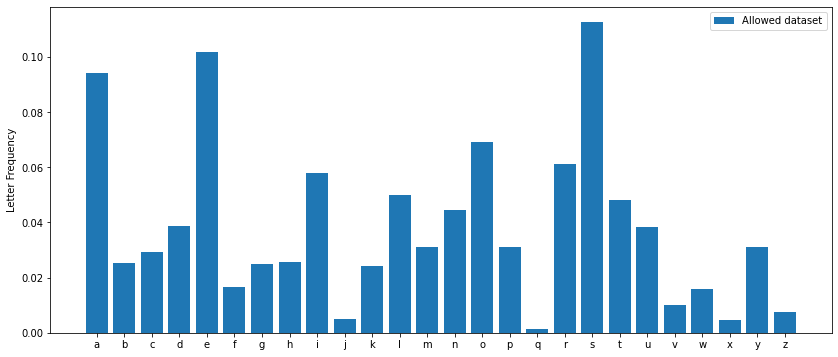

In [10]:
plt.figure(figsize=(14,6))
plt.bar(df_allowed_letters.index, df_allowed_letters['frequency_allowed'], label="Allowed dataset")
plt.ylabel("Letter Frequency")
plt.legend()
plt.show()

To know which letters are most frequent, we can sort the data and plot the graph again:

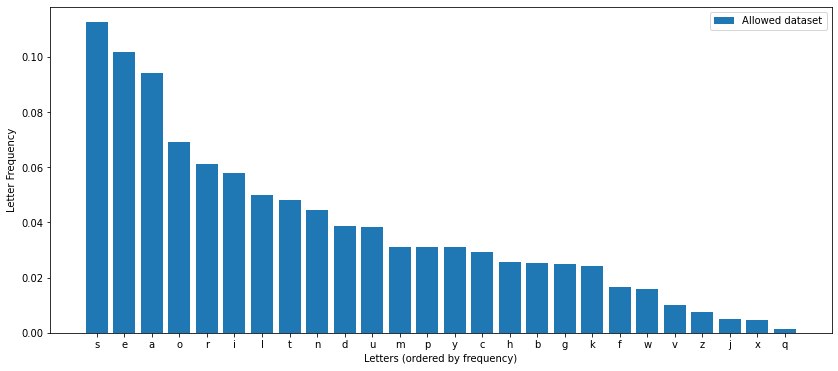

In [11]:
df_aux = df_allowed_letters.sort_values(by='frequency_allowed', ascending=False).copy() 
plt.figure(figsize=(14,6))
plt.bar(df_aux.index, df_aux['frequency_allowed'], label="Allowed dataset")
plt.ylabel("Letter Frequency")
plt.xlabel("Letters (ordered by frequency)")
plt.legend()
plt.show()

The letter `s` is the most frequent letter, followed by the letters `e`, `a`, `o` and `r`. Less frequent letters are the letters `q`, `x`, `j`, `z` and `v`.

Hence, words containing the letters `s`, `e`, `a`, `o` and `t` should be better guesses. Let's find out which ones they are! 



## Strength of each word

To estimate the Strength of each word I will create an auxiliary `DataFrame` with each letter separated in a single cell:

In [12]:
df_allowed_aux = pd.DataFrame(df_allowed['letters'].to_list(), columns=range(1,6))
df_allowed_aux.head(2)

,1,2,3,4,5
0,a,a,h,e,d
1,a,a,l,i,i


And I will also create a `DataFrame` with just the frequencies of each letter:

In [13]:
df_freq_allowed = pd.DataFrame(data=df_allowed_letters['frequency_allowed'])
df_freq_allowed.head(2)

,frequency_allowed
a,0.094041
b,0.025260


This data frame contains the estimated strength for each letter, regardless of the position the letter occupies in the word. I will export this dataset as it will be used in other analyses. This dataset is available at [this link](https://drive.google.com/file/d/1HlLaMr2R0XO6jmnjBQA_XG18SfG9h95l/view?usp=sharing).

In [14]:
df_freq_allowed.to_csv("df_freq_allowed.csv", index=True)

Now we can use the frequency estimated for each `letter` to find the strength for each word. We just need to replace each `letter` on the `df_allowed_aux` for its corresponding frequency (`df_freq_allowed`):

In [15]:
for i in df_freq_allowed.index:
  df_allowed_aux.replace(i, df_freq_allowed['frequency_allowed'][i], inplace=True)
df_allowed_aux.head(2)

,1,2,3,4,5
0,0.094041,0.094041,0.02573,0.101886,0.038660
1,0.094041,0.094041,0.04977,0.057953,0.057953


Now, we need to sum each row

In [16]:
df_allowed_aux['strength'] = df_allowed_aux.sum(axis=1)
df_allowed_aux.head(2)

,1,2,3,4,5,strength
0,0.094041,0.094041,0.02573,0.101886,0.038660,0.354359
1,0.094041,0.094041,0.04977,0.057953,0.057953,0.353758


Since the row indices are the same, we can allocate the estimated strength directly to the `DataFrame` `df_answers`:

In [17]:
df_allowed['strength'] = df_allowed_aux['strength'].copy()
df_allowed['strength'] = df_allowed['strength'].round(7)
df_allowed.head(2)

,words,letters,strength
0,aahed,"[a, a, h, e, d]",0.354359
1,aalii,"[a, a, l, i, i]",0.353758


NOTE: Column `"strength"` has been rounded to 7 decimal places to prevent mistakes due to decimal fluctuations.

The best words are going to be the ones that have the highest "strength". For this, I will create a new column called `"rank"` by applying the `rank` function to the `"strength"` column:

In [18]:
df_allowed['rank'] = df_allowed['strength'].rank(ascending=False, method="dense").astype(int)
df_allowed.head(2)

,words,letters,strength,rank
0,aahed,"[a, a, h, e, d]",0.354359,892
1,aalii,"[a, a, l, i, i]",0.353758,900


Hence, the **TOP 10 words** are:

In [19]:
df_allowed[df_allowed['rank'] <= 10].sort_values(by='rank')

,words,letters,strength,rank
2801,esses,"[e, s, s, e, s]",0.541353,1
481,asses,"[a, s, s, e, s]",0.533509,2
7925,sasse,"[s, a, s, s, e]",0.533509,2
8127,sessa,"[s, e, s, s, a]",0.533509,2
2642,eases,"[e, a, s, e, s]",0.522868,3
8040,sease,"[s, e, a, s, e]",0.522868,3
8308,sises,"[s, i, s, e, s]",0.497420,4
6302,oases,"[o, a, s, e, s]",0.490119,5
8113,seres,"[s, e, r, e, s]",0.489988,6
8060,seers,"[s, e, e, r, s]",0.489988,6


## Adding penalty for words with repeated letters

As we obtained in the previous analyses, the words with repeated letters were well classified. Words with the letter s repeated 3 times were the best, as the letter s is the most frequent letter in the dataset. But this behavior is not useful for our purposes, as repeating letters on the first kick reduces the chances of hitting!

So we need to apply a penalty to words that have repeated letters. For this, I will use the same strategy adopted in other analyses.

To apply this penalty, we need to know which words contain repeated letters. To figure this out, I'm going to apply a function (`unique`) that returns only the single letters of a string and also maintains the order of the letters in the word.

In [20]:
def unique(sequence):
  # source  https://stackoverflow.com/a/58666031/17872198
  seen = set()
  return [x for x in sequence if not (x in seen or seen.add(x))]
## example
unique("juliana")

['j', 'u', 'l', 'i', 'a', 'n']

In [21]:
df_allowed['unique_letters'] = df_allowed['letters'].apply(unique).apply("".join)
df_allowed.head(2)

,words,letters,strength,rank,unique_letters
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed
1,aalii,"[a, a, l, i, i]",0.353758,900,ali


Now we need to count the number of letters left after removing the repeated letters. For this, we can use the `len` function in the `"unique_letters"` column:

In [22]:
df_allowed['count_unique'] = df_allowed['unique_letters'].str.len()
df_allowed.head(2)

,words,letters,strength,rank,unique_letters,count_unique
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3


To find out how many words contain 5 unique letters we can use the `value_counts` method:

In [23]:
df_allowed['count_unique'].value_counts()

5    6756
4    3494
3     399
2       8
Name: count_unique, dtype: int64

Out of curiosity, let's find out the word that contains only 2 unique letters. To do this, we just need a filter:

In [24]:
df_allowed[df_allowed['count_unique'] == 2]

,words,letters,strength,rank,unique_letters,count_unique
313,anana,"[a, n, a, n, a]",0.371343,597,an,2
573,ayaya,"[a, y, a, y, a]",0.344018,1113,ay,2
1728,cocco,"[c, o, c, c, o]",0.225598,4729,co,2
2801,esses,"[e, s, s, e, s]",0.541353,1,es,2
6049,nanna,"[n, a, n, n, a]",0.321910,1723,na,2
6689,peepe,"[p, e, e, p, e]",0.367664,656,pe,2
8930,susus,"[s, u, s, u, s]",0.414301,142,su,2
9014,taata,"[t, a, a, t, a]",0.378437,482,ta,2


Now it is necessary to decide a criterion for penalizing words with repeated letters. As the more repeated letters, the worse the guess, the penalty should be greater the more repeated letters the word has.

The criterion I will use is very simple: for each repeated letter, the word must lose 20% of its strength. That is:

- words with `5` unique letters should not be penalized;
- words with `4` unique letters must lose 20% of their strength;
- words with `3` unique letters must lose 40% of their strength;
- words with `2` unique letters must lose 60% of their strength;

We can write a simple function that will do this task:

In [25]:
def penalty_func(x):
  if x == 5:
    return 1
  elif x == 4:
    return 0.8
  elif x == 3:
    return 0.6
  elif x == 2:
    return 0.4
  else:
    return 0.2

Now we just need to create a new column with the penalty (correction factor):

In [26]:
df_allowed['penalty'] = df_allowed['count_unique'].apply(penalty_func)
df_allowed.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4,0.8
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3,0.6


To apply the penalty, simply multiply column `"strength"` by the `"penalty"` column:

In [27]:
df_allowed['strength_penalty'] = df_allowed['strength']*df_allowed['penalty']
df_allowed['strength_penalty'] = df_allowed['strength_penalty'].round(7)
df_allowed.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4,0.8,0.283487
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3,0.6,0.212255


Finally, we can create a new ranking based on the `"strength_penalty"` column:

In [28]:
df_allowed['rank_penalty'] = df_allowed['strength_penalty'].rank(ascending=False, method="dense").astype(int)
df_allowed.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4,0.8,0.283487,2310
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3,0.6,0.212255,4967


Hence, the **TOP 5 best words**:

In [29]:
df_allowed[df_allowed['rank_penalty'] <= 5].sort_values(by='rank_penalty')

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty
112,aeros,"[a, e, r, o, s]",0.438754,69,aeros,5,1.0,0.438754,1
8530,soare,"[s, o, a, r, e]",0.438754,69,soare,5,1.0,0.438754,1
113,aesir,"[a, e, s, i, r]",0.427569,92,aesir,5,1.0,0.427569,2
7414,reais,"[r, e, a, i, s]",0.427569,92,reais,5,1.0,0.427569,2
8109,serai,"[s, e, r, a, i]",0.427569,92,serai,5,1.0,0.427569,2
257,aloes,"[a, l, o, e, s]",0.427362,93,aloes,5,1.0,0.427362,3
8810,stoae,"[s, t, o, a, e]",0.425748,101,stoae,5,1.0,0.425748,4
9373,toeas,"[t, o, e, a, s]",0.425748,101,toeas,5,1.0,0.425748,4
110,aeons,"[a, e, o, n, s]",0.422201,111,aeons,5,1.0,0.422201,5


## Adding weights due to letter position in the word

Note that the words `aeros` and `soare` have the same strength as they are *anagrams*. But they are not the same. We need to take into account the position of each letter on the word. Let's look at the word count that contains the letter `a`:

In [30]:
df_allowed_letters.loc[["a"]]

,1,2,3,4,5,sum,frequency_allowed
a,596,1959,929,911,616,5011,0.094041


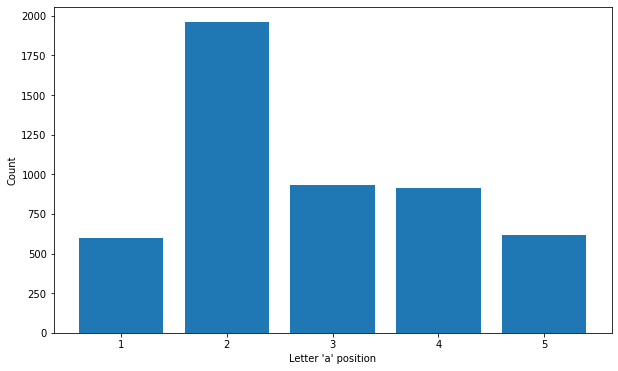

In [31]:
plt.figure(figsize=(10,6))
plt.bar(list(df_allowed_letters.columns[:5]), df_allowed_letters.loc[["a"], :5].values.flatten().tolist())
plt.xlabel("Letter 'a' position")
plt.ylabel("Count")
plt.show()

Based only on the letter `"a"` count in each of the five possible positions, the word `"soare"` should be ranked better than the word `"aeros"` because the letter `"a"` is in a position where it occurs more often.

To get a better look at this, let's plot a heatmap. For this, I will create a new `DataFrame` with the five columns containing the count of each letter in the respective position (filtering the `DataFrame` `df_allowed_letters`):

In [32]:
df_allowed_letters_position = df_allowed_letters[[1, 2, 3, 4, 5]].copy()
df_allowed_letters_position.head(2)

,1,2,3,4,5
a,596,1959,929,911,616
b,736,65,278,219,48


Now we can plot a heatmap using seaborn:

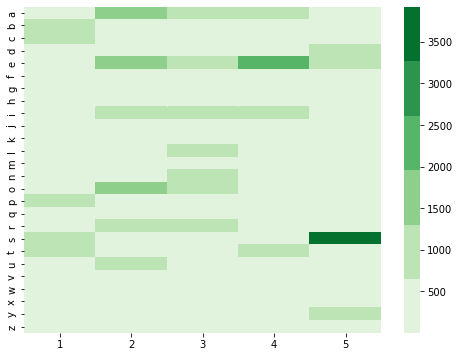

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_allowed_letters_position[[1, 2, 3, 4, 5]], cmap=sns.color_palette("Greens"))
plt.show()

We can see that the letter `"s"` has a much higher occurrence in the first position than in the others. Similarly, the letter `"y"` occurs more often in the fifth position. The letter `"e"` occurs predominantly in positions 2, 4 and 5.

Hence, considering where the letter is in the word is an important criterion to decide which word is the best. 

To estimate the strength of each word by position, simply divide the frequency of the letter in a position by the total number of letters in the respective position. We can use a loop to loop through the columns as follows:

In [34]:
for i in range(1,6):
  df_allowed_letters_position[i] = df_allowed_letters_position[i]/df_allowed_letters_position[i].sum()
df_allowed_letters_position.head(2)

,1,2,3,4,5
a,0.055926,0.183823,0.087173,0.085484,0.057802
b,0.069063,0.006099,0.026086,0.020550,0.004504


The sum in each column must equal 1:

In [35]:
for i in range(1,6):
  print(df_allowed_letters_position[i].sum())

1.0
0.9999999999999999
1.0
1.0
1.0000000000000002


We repeat the heatmap, but with estimated weights for each word in each position annotate:

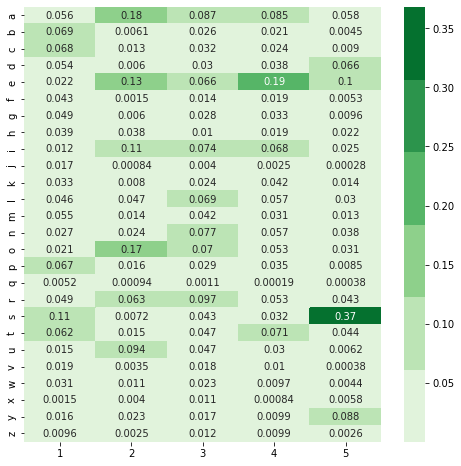

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_allowed_letters_position[[1, 2, 3, 4, 5]].fillna(0), cmap=sns.color_palette("Greens"), annot=True)
plt.show()

We can use the matrix that contains the weights to consider the position of each letter in the word. To do this, we just need to multiply each probability by the respective weight:

In [37]:
df_freq_weigth_allowed = pd.DataFrame(columns=range(1,6))
for i in range(1,6):
  df_freq_weigth_allowed[i] = df_allowed_letters_position[i]*df_freq_allowed['frequency_allowed']
df_freq_weigth_allowed.head(2)

,1,2,3,4,5
a,0.005259,0.017287,0.008198,0.008039,0.005436
b,0.001745,0.000154,0.000659,0.000519,0.000114


This data frame contains the estimated strength for each letter, considering the position that the letter occupies in the word. I will export this dataset as it will be used in other analyses. This dataset is available at [this link](
https://drive.google.com/file/d/1XOwGPnKWCKozj-CgSbF7OzZo_am8QdpU/view?usp=sharing).

In [38]:
df_freq_weigth_allowed.to_csv("df_freq_weigth_allowed.csv", index=True)

Now I will recreate the auxiliary dataframe:

In [39]:
df_allowed_aux = pd.DataFrame(df_allowed['letters'].to_list(), columns=range(1,6))
df_allowed_aux.head(2)

,1,2,3,4,5
0,a,a,h,e,d
1,a,a,l,i,i


And then, I will replace each letter by its respective frequency, but using the frequencies with the weight of the position considered:

In [40]:
for column in df_freq_weigth_allowed.columns:
  for i in df_freq_weigth_allowed.index:
    df_allowed_aux[column].replace(i, df_freq_weigth_allowed[column][i], inplace=True)
df_allowed_aux.head(2)

,1,2,3,4,5
0,0.005259,0.017287,0.000268,0.019207,0.002558
1,0.005259,0.017287,0.003437,0.003926,0.001463


Now, we just  need to sum each row:

In [41]:
df_allowed_aux['strength'] = df_allowed_aux.sum(axis=1)
df_allowed_aux.head(2)

,1,2,3,4,5,strength
0,0.005259,0.017287,0.000268,0.019207,0.002558,0.044579
1,0.005259,0.017287,0.003437,0.003926,0.001463,0.031373


Now we concatenate this this other way of estimating the strength of words in the original `DataFrame`:

In [42]:
df_allowed['strength_weight'] = df_allowed_aux['strength'].copy()
df_allowed['strength_weight'] = df_allowed['strength_weight'].round(7)
df_allowed.head()

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weight
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4,0.8,0.283487,2310,0.044579
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3,0.6,0.212255,4967,0.031373
2,aargh,"[a, a, r, g, h]",0.299991,2426,argh,4,0.8,0.239992,4071,0.029858
3,aarti,"[a, a, r, t, i]",0.355353,874,arti,4,0.8,0.284283,2282,0.033379
4,abaca,"[a, b, a, c, a]",0.336492,1307,abc,3,0.6,0.201895,5242,0.019755


Finally, we can apply the penalty due to word repetition:

In [43]:
df_allowed['strength_weight_penalty'] = df_allowed['strength_weight']*df_allowed['penalty']
df_allowed['strength_weight_penalty'] = df_allowed['strength_weight_penalty'].round(7)
df_allowed.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weight,strength_weight_penalty
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4,0.8,0.283487,2310,0.044579,0.035663
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3,0.6,0.212255,4967,0.031373,0.018824


and create a new ranking for the words:

In [44]:
df_allowed['rank_weight_penalty'] = df_allowed['strength_weight_penalty'].rank(ascending=False, method="dense").astype(int)
df_allowed.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weight,strength_weight_penalty,rank_weight_penalty
0,aahed,"[a, a, h, e, d]",0.354359,892,ahed,4,0.8,0.283487,2310,0.044579,0.035663,4457
1,aalii,"[a, a, l, i, i]",0.353758,900,ali,3,0.6,0.212255,4967,0.031373,0.018824,7972


Hence, the **TOP 10 words** are:

In [45]:
df_allowed[['words', 'rank', 'rank_penalty', 'rank_weight_penalty']][df_allowed['rank_weight_penalty'] <= 10].sort_values(by='rank_weight_penalty')

,words,rank,rank_penalty,rank_weight_penalty
9100,tares,128,7,1
4998,lares,122,6,2
6602,pares,233,19,3
2097,dares,178,11,4
1423,cares,249,21,5
680,bares,281,29,6
5513,mares,231,18,7
3388,gares,284,30,8
6063,nares,143,8,9
3926,hares,277,27,10


And the **WORST 10 words** are:

In [46]:
df_allowed[['words', 'rank', 'rank_penalty', 'rank_weight_penalty']][df_allowed['rank_weight_penalty'] >= (df_allowed['rank_weight_penalty'].max() - 9)].sort_values(by='rank_weight_penalty')

,words,rank,rank_penalty,rank_weight_penalty
1605,chuff,5575,6244,10538
9684,uhuru,5146,6195,10539
2760,enzym,4924,4874,10540
3836,gyppy,5539,6253,10541
6779,phpht,5502,6249,10542
4319,immix,5368,6225,10543
10377,xylyl,5483,6246,10544
4261,hyphy,5551,6259,10545
9736,undug,5349,6064,10546
9743,ungum,5415,6107,10547


## Rethinking frequencies and weights

In this notebook we find out which are the best words to use as a first try. However, the words used do not have words that are used as the word of the day. Thus, the results obtained are not optimized for the possible answers.

To fix this, instead of using the frequencies and weights estimated for the `df_allowed` we can use the results obtained for the `df_answers` dataset.

First, I will remove some columns to improve the visualization of the results:

In [47]:
df_allowed.drop(["strength", "rank", "unique_letters",	"count_unique",	"strength_penalty",	"rank_penalty",	"strength_weight",	"strength_weight_penalty"],
                inplace=True,
                axis=1)
df_allowed.head(2)

,words,letters,penalty,rank_weight_penalty
0,aahed,"[a, a, h, e, d]",0.8,4457
1,aalii,"[a, a, l, i, i]",0.6,7972


Now I will import the frequencies considering the position of the letters in the word obtained for the dataset that contains only the possible answers:

In [48]:
url_answers = 'https://drive.google.com/file/d/10vlb5SJCO3uNIKHghS7spP-SeKvwPAxA/view?usp=sharing'
url_answers = 'https://drive.google.com/uc?id=' + url_answers.split('/')[-2]
df_freq_weights_answers = pd.read_csv(url_answers, index_col=0)
df_freq_weights_answers.head(2)

,1,2,3,4,5
a,0.005151,0.011107,0.011216,0.005955,0.002338
b,0.001814,0.000168,0.000598,0.000252,0.000115


Before using this data, it is necessary to transform the column name from string to integer, which is done as follows:

In [49]:
df_freq_weights_answers.columns = df_freq_weights_answers.columns.astype(int) 

Then we just need to follow the same steps as before, but using this other dataset. I need to recreate the auxiliary dataframe:


In [50]:
df_allowed_aux = pd.DataFrame(df_allowed['letters'].to_list(), columns=range(1,6))
df_allowed_aux.head(2)

,1,2,3,4,5
0,a,a,h,e,d
1,a,a,l,i,i


And then, I will replace each letter by its respective frequency, but using the new dataset:

In [51]:
for column in df_freq_weights_answers.columns:
  for i in df_freq_weights_answers.index:
    df_allowed_aux[column].replace(i, df_freq_weights_answers[column][i], inplace=True)
df_allowed_aux.head(2)

,1,2,3,4,5
0,0.005151,0.011107,0.000131,0.014632,0.001731
1,0.005151,0.011107,0.003005,0.003956,0.000275


Now, we just  need to sum each row:

In [52]:
df_allowed_aux['strength'] = df_allowed_aux.sum(axis=1)
df_allowed_aux.head(2)

,1,2,3,4,5,strength
0,0.005151,0.011107,0.000131,0.014632,0.001731,0.032752
1,0.005151,0.011107,0.003005,0.003956,0.000275,0.023495


Now we concatenate this this other way of estimating the strength of words in the original `DataFrame`:

In [53]:
df_allowed['strength_answers'] = df_allowed_aux['strength'].round(7).copy()
df_allowed.head(2)

,words,letters,penalty,rank_weight_penalty,strength_answers
0,aahed,"[a, a, h, e, d]",0.8,4457,0.032752
1,aalii,"[a, a, l, i, i]",0.6,7972,0.023495


Finally, we can apply the penalty due to word repetition:

In [54]:
df_allowed['strength_answers_penalty'] = df_allowed['strength_answers']*df_allowed['penalty']
df_allowed['strength_answers_penalty'] = df_allowed['strength_answers_penalty'].round(7)
df_allowed.head(2)

,words,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty
0,aahed,"[a, a, h, e, d]",0.8,4457,0.032752,0.026201
1,aalii,"[a, a, l, i, i]",0.6,7972,0.023495,0.014097


and create a new ranking for the words:

In [55]:
df_allowed['rank_answers'] = df_allowed['strength_answers_penalty'].rank(ascending=False, method="dense").astype(int)
df_allowed.head(2)

,words,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty,rank_answers
0,aahed,"[a, a, h, e, d]",0.8,4457,0.032752,0.026201,2537
1,aalii,"[a, a, l, i, i]",0.6,7972,0.023495,0.014097,8372


Hence, the **TOP 10 words** are:

In [56]:
df_allowed[df_allowed['rank_answers'] <= 10].sort_values(by='rank_answers')

,words,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty,rank_answers
8530,soare,"[s, o, a, r, e]",1.0,3518,0.052814,0.052814,1
7852,saine,"[s, a, i, n, e]",1.0,3446,0.050321,0.050321,2
8403,slane,"[s, l, a, n, e]",1.0,4385,0.049163,0.049163,3
7845,saice,"[s, a, i, c, e]",1.0,3595,0.049121,0.049121,4
8532,soave,"[s, o, a, v, e]",1.0,3771,0.047977,0.047977,5
7913,saree,"[s, a, r, e, e]",0.8,2622,0.059855,0.047884,6
8397,slade,"[s, l, a, d, e]",1.0,4500,0.046269,0.046269,7
7914,sarge,"[s, a, r, g, e]",1.0,3448,0.046105,0.046105,8
7059,prase,"[p, r, a, s, e]",1.0,5461,0.045898,0.045898,9
1718,coate,"[c, o, a, t, e]",1.0,4423,0.045883,0.045883,10


And the **WORST 10 words** are:

In [57]:
df_allowed[df_allowed['rank_answers'] >= (df_allowed['rank_answers'].max() - 9)].sort_values(by='rank_answers')

,words,letters,penalty,rank_weight_penalty,strength_answers,strength_answers_penalty,rank_answers
4260,hypha,"[h, y, p, h, a]",0.8,10456,0.004906,0.003925,10432
3835,gyppo,"[g, y, p, p, o]",0.8,10526,0.004811,0.003849,10433
4739,kibbi,"[k, i, b, b, i]",0.6,10502,0.006340,0.003804,10434
4892,kudzu,"[k, u, d, z, u]",0.8,10530,0.004546,0.003636,10435
4319,immix,"[i, m, m, i, x]",0.6,10543,0.005986,0.003592,10436
3274,fuffs,"[f, u, f, f, s]",0.6,5556,0.005823,0.003494,10437
4897,kukus,"[k, u, k, u, s]",0.6,5403,0.005820,0.003492,10438
4557,jujus,"[j, u, j, u, s]",0.6,5562,0.005593,0.003356,10439
4324,imshi,"[i, m, s, h, i]",0.8,10488,0.003979,0.003183,10440
9711,umphs,"[u, m, p, h, s]",1.0,3731,0.003123,0.003123,10441


The analysis to choose the best pair of words to use in the first two attempts follows in [this notebook](https://colab.research.google.com/drive/1s9Uqi8BPLoPthv_SxiDHIcjwPKOZsgU5?usp=sharing).